In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data2 = pd.read_csv("../data_pretraitee/data_pretraite.csv", sep=';', index_col = 0)

In [62]:
# col = ["N2O","Date","Bande","month","year"]
col = ["N2O","Date","Bande", "N2O_J182"]

In [63]:
df = data2[col] # Sélection des colonnes qui vont nous être utile

In [64]:
df.head()

,N2O,Date,Bande,N2O_J182
0,18.537129,2018-03-14,acs,12.785388
1,2.088998,2018-03-14,pn,5.110888
2,1.488817,2018-03-14,bi,3.911595
3,1.390654,2018-03-14,bio,4.320695
4,3.297613,2018-03-14,elev,7.726488


In [65]:
df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')

/tmp/ipykernel_2060470/2238208434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d')


In [66]:
print(df.N2O.mean())

3.8825638023633453


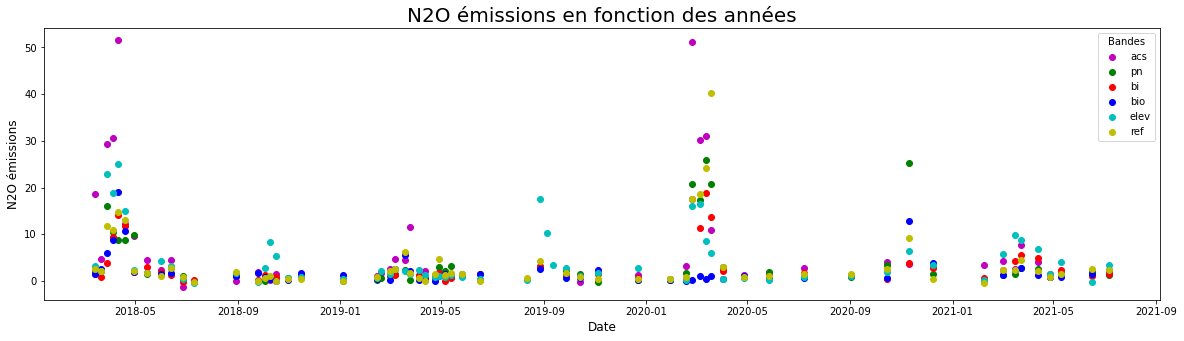

In [67]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 5))
plt.title("N2O émissions en fonction des années", fontsize = 20)
plt.ylabel('N2O émissions', fontsize = 12) 
plt.xlabel('Date', fontsize = 12) 

markers = ['mo', 'go', 'ro', 'bo', 'co', 'yo']
for index, bande in enumerate(df.Bande.unique()):
    x = df.loc[df.Bande == bande, "Date"]
    y = df.loc[df.Bande == bande, "N2O"]
    plt.plot(x, y, markers[index])

plt.legend(df.Bande.unique(), title="Bandes")
plt.show()
# fig.savefig('../images/allbands.jpg')

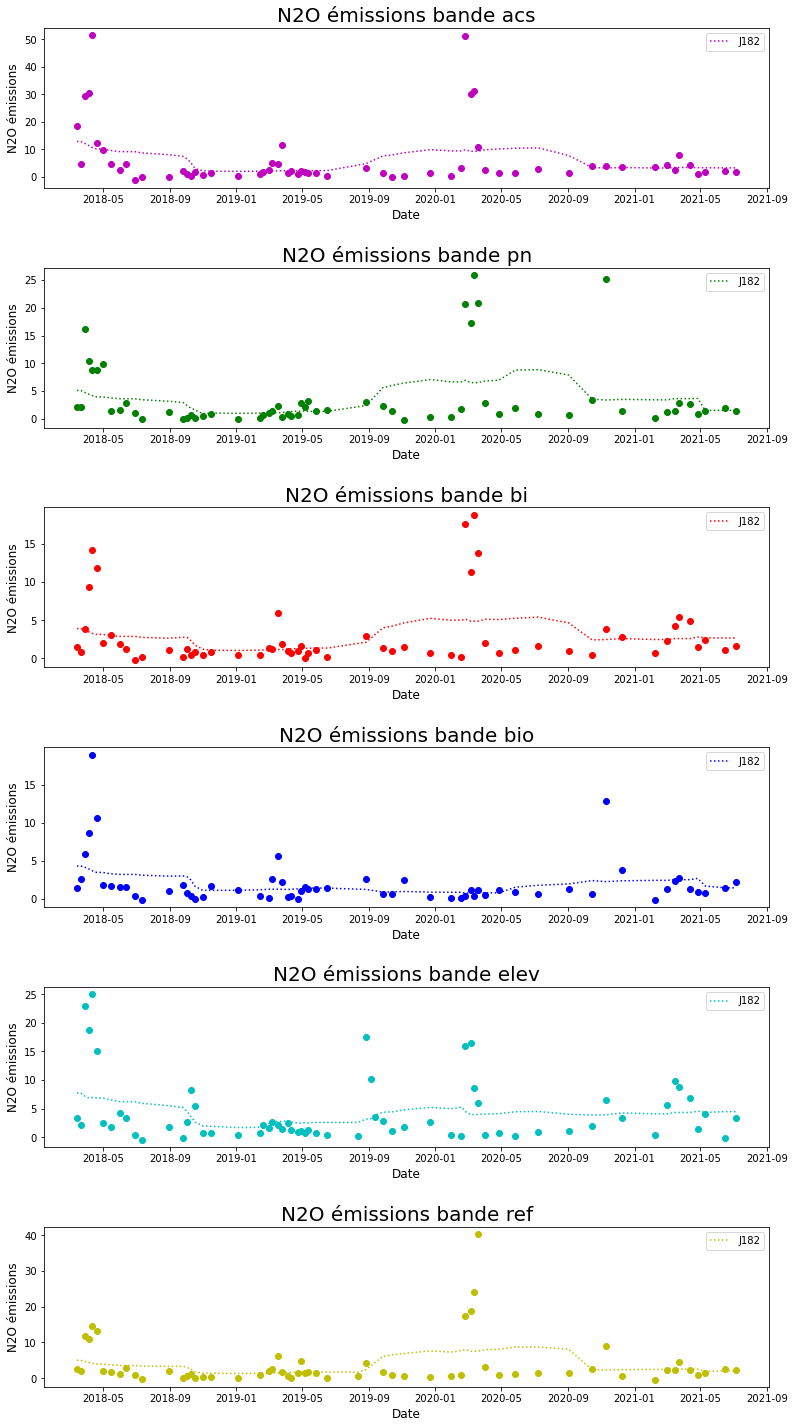

In [68]:
markers = ['m', 'g', 'r', 'b', 'c', 'y']
# markers = ['#A', '#B', '#C', '#D', '#E', '#F']

# colors = ["F3333","F8C00", "FD700", "0FF00", "0FFFF"]
# df['N2O_J182'] = df['N2O_J182']  * 1.2

fig2 = plt.figure(figsize=(13, 25))

for index, bande in enumerate(df.Bande.unique()):

    plt.subplot(6,1,index + 1)
    plt.subplots_adjust(wspace=0.7, hspace=0.5) 
    plt.title("N2O émissions bande " + bande, fontsize = 20)
    plt.ylabel('N2O émissions', fontsize = 12) 
    plt.xlabel('Date', fontsize = 12) 

    dt_t = df.loc[df.Bande == bande, ["Date", "N2O", "N2O_J182"]].sort_values(by="Date")
    x = dt_t.iloc[:,0]
    y = dt_t.iloc[:,1]
    plt.plot(x, y, str(markers[index] + 'o'))

    # plt.axhline(y.mean(), color = markers[index], linestyle="--")  # Moyenne

    # O3 = dt_t.iloc[:,2]
    #plt.plot(x, dt_t.iloc[:,2], color = markers[index], linestyle="-", label="O3")
    #plt.plot(x, dt_t.iloc[:,3], color = markers[index], linestyle="--", label="J45")
    plt.plot(x, dt_t.iloc[:,2], color = markers[index], linestyle=":", label="J182") 

    plt.legend()
    # dt_t['year'] = dt_t.Date.dt.year    # Rajout d'une colonne year
    # dt_mean = dt_t.groupby('year', axis = 0).mean() # On récupère la valeur moyenne par année
    # y_mean = dt_t['year'].map(dt_mean['N2O']) # On map les valeurs sur le dataframe d'origine
    # plt.plot(x, y_mean, color = markers[index], linestyle="-")  # Moyenne par année
    # plt.xlim([dt_t.Date.min(), dt_t.Date.max()])
plt.show()
# fig2.savefig('../images/allbandsmean.jpg')

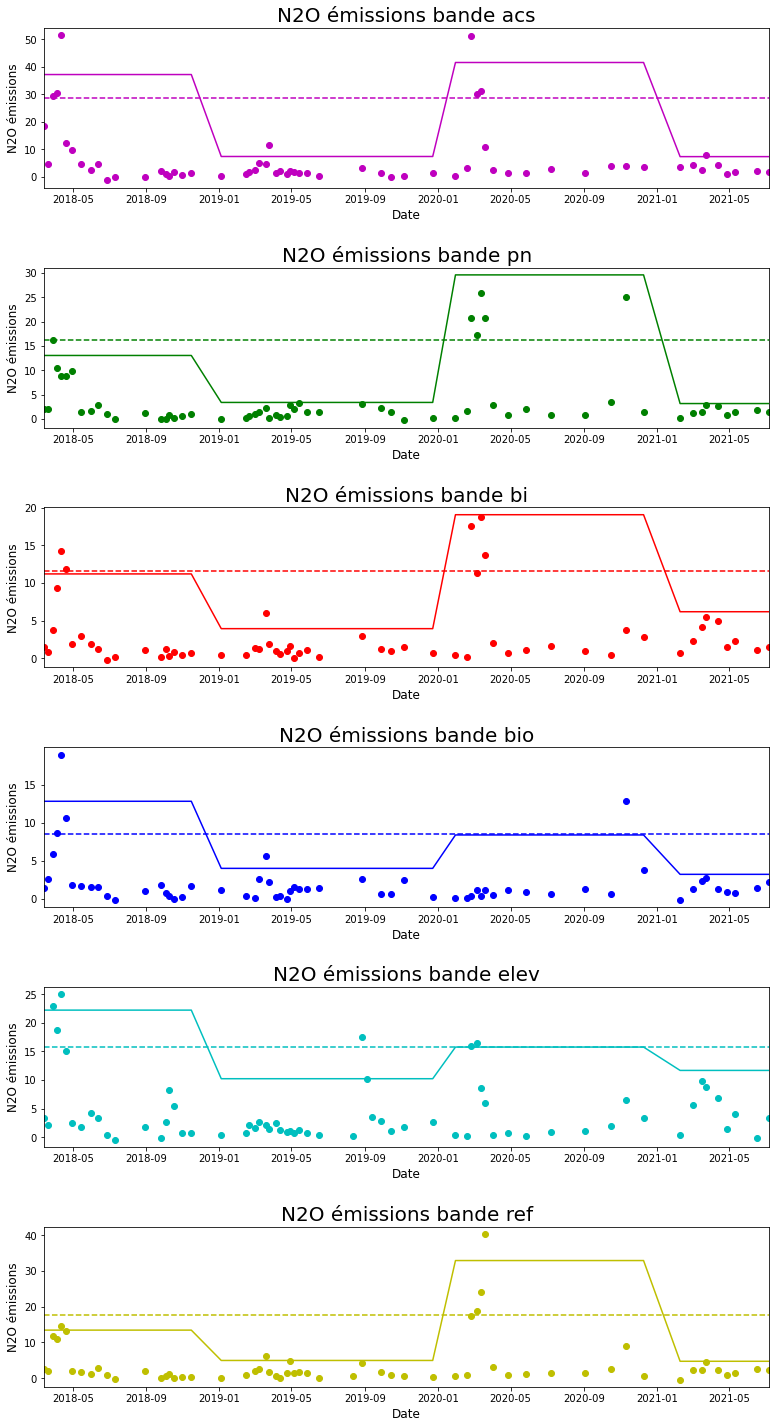

In [69]:
markers = ['m', 'g', 'r', 'b', 'c', 'y']

fig3 = plt.figure(figsize=(13, 25))

for index, bande in enumerate(df.Bande.unique()):

    plt.subplot(6,1,index + 1)
    plt.subplots_adjust(wspace=0.7, hspace=0.5) 
    plt.title("N2O émissions bande " + bande, fontsize = 20)
    plt.ylabel('N2O émissions', fontsize = 12) 
    plt.xlabel('Date', fontsize = 12) 
    
    dt_t = df.loc[df.Bande == bande, ["Date", "N2O"]].sort_values(by="Date")
    x = dt_t.iloc[:,0]
    y = dt_t.iloc[:,1]
    plt.plot(x, y, str(markers[index] + 'o'))

    plt.axhline((y.mean()+2*y.std()), color = markers[index], linestyle="--")  # Moyenne

    dt_t['year'] = dt_t.Date.dt.year    # Rajout d'une colonne year
    dt_mean = dt_t.groupby('year', axis = 0).mean()    # On récupère la valeur moyenne par année
    dt_std = dt_t.groupby('year', axis = 0).std()   # On récupère l'écart type par année
    dt_mean2sd=dt_mean+2*dt_std
    y_mean2sd = dt_t['year'].map(dt_mean2sd['N2O']) # On map les valeurs sur le dataframe d'origine
    plt.plot(x, y_mean2sd, color = markers[index], linestyle="-")  # Moyenne +2SDpar année
    plt.xlim([dt_t.Date.min(), dt_t.Date.max()])
plt.show()
fig3.savefig('../images/allbandsmean2sd.jpg')

In [70]:
print("\n Using MEAN per year: \n")
for index, bande in enumerate(df.Bande.unique()):  
    dt_t = df.loc[df.Bande == bande, ["Date", "N2O"]]
    dt_t['year'] = dt_t.Date.dt.year    # Rajout d'une colonne year
    dt_mean = dt_t.groupby('year', axis = 0).mean()
    for y in [2018, 2019, 2020, 2021]:
        print("year:", y, "bande:", bande, "\t mean per year \t:", dt_mean[dt_mean.index.values==y]['N2O'].values,
              "\t sd per year \t:",dt_std[dt_std.index.values==y]['N2O'].values)
        releve_nb=len((dt_t.loc[dt_t.year==y, "N2O"].values))
        peak_nb_list=(((dt_t.loc[dt_t.year==y, "N2O"].values)>((dt_mean[dt_mean.index.values==y]['N2O']).values))) 
        print("\t", "number of peak this year:", np.where(peak_nb_list, 1, 0).sum(), "\t", "number of releves this year:", releve_nb)
        
print("\n Using MEAN + 2SD: \n")
for index, bande in enumerate(df.Bande.unique()):  
    dt_t = df.loc[df.Bande == bande, ["Date", "N2O"]]
    dt_t['year'] = dt_t.Date.dt.year    # Rajout d'une colonne year
    dt_mean = dt_t.groupby('year', axis = 0).mean()    
    dt_std = dt_t.groupby('year', axis = 0).std()  
    dt_mean2sd=dt_mean+2*dt_std
    for y in [2018, 2019, 2020, 2021]:
        print("year:", y, "bande:", bande, "\t mean+2sd per year \t:", dt_mean2sd[dt_mean2sd.index.values==y]['N2O'].values)
        releve_nb=len((dt_t.loc[dt_t.year==y, "N2O"].values))
        peak_nb_list=(((dt_t.loc[dt_t.year==y, "N2O"].values)>((dt_mean2sd[dt_mean2sd.index.values==y]['N2O']).values))) 
        print("\t", "number of peak this year:", np.where(peak_nb_list, 1, 0).sum(), "\t", "number of releves this year:", releve_nb)   



 Using MEAN per year: 

year: 2018 bande: acs 	 mean per year 	: [9.07885021] 	 sd per year 	: [4.94584515]
	 number of peak this year: 6 	 number of releves this year: 19
year: 2019 bande: acs 	 mean per year 	: [2.13261955] 	 sd per year 	: [1.65252753]
	 number of peak this year: 6 	 number of releves this year: 20
year: 2020 bande: acs 	 mean per year 	: [10.46722976] 	 sd per year 	: [12.09247872]
	 number of peak this year: 4 	 number of releves this year: 14
year: 2021 bande: acs 	 mean per year 	: [3.17425727] 	 sd per year 	: [1.34968975]
	 number of peak this year: 4 	 number of releves this year: 9
year: 2018 bande: pn 	 mean per year 	: [3.62025127] 	 sd per year 	: [4.94584515]
	 number of peak this year: 5 	 number of releves this year: 19
year: 2019 bande: pn 	 mean per year 	: [1.30203288] 	 sd per year 	: [1.65252753]
	 number of peak this year: 10 	 number of releves this year: 20
year: 2020 bande: pn 	 mean per year 	: [8.85702734] 	 sd per year 	: [12.09247872]
	 n


 Using MEAN and SD over 4 years: 

bande: acs 	 mean 	: N2O    6.294517
dtype: float64 	 sd 	: N2O    11.210332
dtype: float64
	 number of releves: 62
bande: pn 	 mean 	: N2O    3.751454
dtype: float64 	 sd 	: N2O    6.213672
dtype: float64
	 number of releves: 62
bande: bi 	 mean 	: N2O    2.945798
dtype: float64 	 sd 	: N2O    4.301404
dtype: float64
	 number of releves: 61
bande: bio 	 mean 	: N2O    2.036139
dtype: float64 	 sd 	: N2O    3.266223
dtype: float64
	 number of releves: 61
bande: elev 	 mean 	: N2O    4.321175
dtype: float64 	 sd 	: N2O    5.767077
dtype: float64
	 number of releves: 65
bande: ref 	 mean 	: N2O    3.880187
dtype: float64 	 sd 	: N2O    6.858423
dtype: float64
	 number of releves: 62


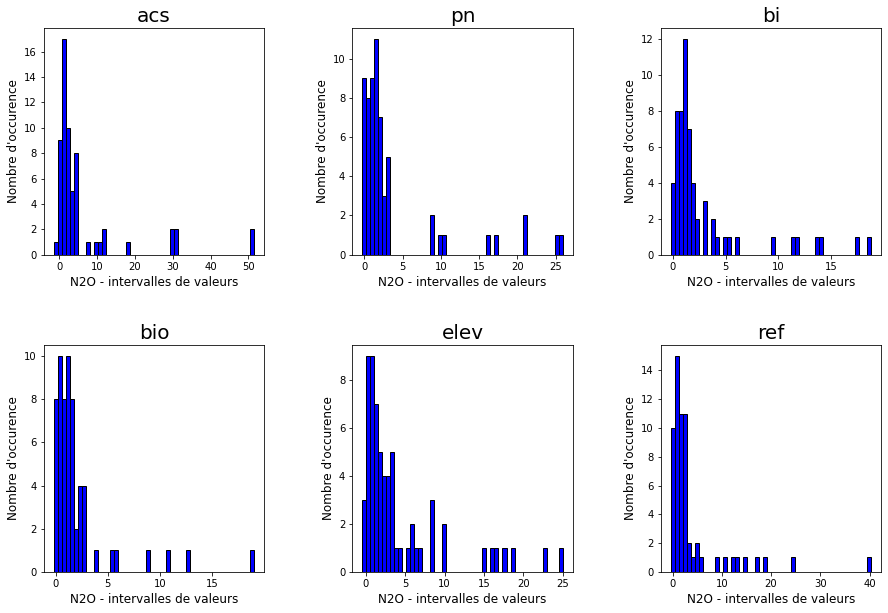

In [71]:
print("\n Using MEAN and SD over 4 years: \n")
fig = plt.figure(figsize=(15, 10))
for index, bande in enumerate(df.Bande.unique()):  
    dt_t = df.loc[df.Bande == bande, ["N2O"]]
    print("bande:", bande, "\t mean \t:", dt_t.mean(), "\t sd \t:",dt_t.std())
    releve_nb=dt_t.shape[0]
    print("\t", "number of releves:", releve_nb)
    plt.subplot(2,3,index+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.hist(dt_t, bins = 50, color = 'blue', edgecolor = 'black')
    plt.ylabel("Nombre d'occurence", fontsize = 12)
    plt.xlabel('N2O - intervalles de valeurs', fontsize = 12)
    plt.title(bande, fontsize = 20)
plt.show()